## ЛУ 2: Увод в Pandas

Двата основни класа обект на библиотеката pandas са серия (pd.Series) и рамка данни (pd.DataFrame). 


### pd.Series

Серията представлява структуриран набор от записи, които споделят един тип на данни (цяло число, низ, число с плаваща запетая, списък и др.). Всяка серия притежава определен набор от методи, които позволяват ефикасна работа с всички записи едновременно. Серията притежава и друг набор методи, които зависят от вида на данните в нея. За всяка стойност серията притежава индекс (в този смисъл тя може да бъде разглеждана и като речник, където всеки индекс е ключ, а всеки запис - стойност).

Нека демонстрираме някои от основните принципи за боравене със серия:

In [1]:
# прието е библиотеката pandas да се импортира със съкращението 'pd'
import pandas as pd

In [2]:
sample_range = ['my_string_value_'+ str(i) for i in range(10)] 
#Горната линия създава списък низове, последван от числа. За повече информация проучи list comprehension.
my_first_series = pd.Series(sample_range)
my_first_series

0    my_string_value_0
1    my_string_value_1
2    my_string_value_2
3    my_string_value_3
4    my_string_value_4
5    my_string_value_5
6    my_string_value_6
7    my_string_value_7
8    my_string_value_8
9    my_string_value_9
dtype: object

Както виждаме, срещу всяка стойност от списъка стои автоматично зададен индекс от 0 до 9. Също така, можем да видим вида на данни, в случая - object, защото работим с низове. Можем да извикаме определена стойност или диапазон стойности от серията:

In [3]:
my_first_series[5]

'my_string_value_5'

In [4]:
my_first_series[5:8]

5    my_string_value_5
6    my_string_value_6
7    my_string_value_7
dtype: object

Също така можем да изведем само индекса или само стойностите:

In [5]:
my_first_series.values[:5]

array(['my_string_value_0', 'my_string_value_1', 'my_string_value_2',
       'my_string_value_3', 'my_string_value_4'], dtype=object)

In [6]:
my_first_series.index

RangeIndex(start=0, stop=10, step=1)

Последно, можем да зададем и собствен индекс на определена серия:


In [7]:
my_first_series.index = ['cust_index_' + str(i) for i in my_first_series.index]
my_first_series[:'cust_index_4']

cust_index_0    my_string_value_0
cust_index_1    my_string_value_1
cust_index_2    my_string_value_2
cust_index_3    my_string_value_3
cust_index_4    my_string_value_4
dtype: object

### pd.DataFrame

Рядко боравим с единични серии данни, обикновено работим с рамки данни (DataFrames). В основата си рамката данни представлява набор от серии, които споделят дължината и индекса си, но не и типовете данни вътре. Това ни позволява да работим едновременно с множество видове данни и да извършваме сложни видове индексиране и филтриране. Също така, всяка серия (колона) в рамката данни има свое име (обикновено низ), по което се различава от другите.

Нека създадем първата си рамка данни от речник, където ключовете са имената на колонките, а стойностите са списъци от стойности, които да включим:

In [8]:
dataframe_length = 100
dict_for_pd_df = {
    'int_column': [i+1 for i in range(dataframe_length)],
    'float_column': [i/10 for i in range(dataframe_length)],
    'string_column': ['string_value_'+str(i) for i in range(dataframe_length)],
    'binary_column': [True if (i+1) % 2==0 else False for i in range(dataframe_length)], #Ако остатъкът от делене на 2 е 0, тогава задаваме вярна стойност: тази колонка проверява дали имаме четни числа или не (добавяме 1, за да отговаря на int_column).
    'list_column': [[i, i*2, i*3] for i in range(dataframe_length)],
    'date_column': ['01/01/' + str(1900+i) for i in range(dataframe_length)]
}
my_first_df = pd.DataFrame(dict_for_pd_df)

#методът head ни позволява да прегледаме първите n реда на рамката данни (tail прави обратното)
my_first_df.head(5)

,int_column,float_column,string_column,binary_column,list_column,date_column
0,1,0.0,string_value_0,False,"[0, 0, 0]",01/01/1900
1,2,0.1,string_value_1,True,"[1, 2, 3]",01/01/1901
2,3,0.2,string_value_2,False,"[2, 4, 6]",01/01/1902
3,4,0.3,string_value_3,True,"[3, 6, 9]",01/01/1903
4,5,0.4,string_value_4,False,"[4, 8, 12]",01/01/1904


Можем да проверим наличните видове данни в рамката. По-сложни видове данни се интерпретират като 'object':

In [9]:
my_first_df.dtypes

int_column         int64
float_column     float64
string_column     object
binary_column       bool
list_column       object
date_column       object
dtype: object

Можем да извикаме списък с различните имена на сериите чрез атрибута columns:

In [10]:
my_first_df.columns

Index(['int_column', 'float_column', 'string_column', 'binary_column',
       'list_column', 'date_column'],
      dtype='object')

Ако искаме да работим с някоя определена серия в рамката данни, можем да я повикаме по два начина:

In [11]:
my_first_df.int_column

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: int_column, Length: 100, dtype: int64

In [12]:
#полезно когато имаме празни места в името на колонката (напр "int column")
my_first_df['int_column'] 

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: int_column, Length: 100, dtype: int64

За да демонстрираме някои концепции, ще сменим индекса на низов:

In [13]:
my_first_df.index = ['i' + str(i) for i in my_first_df.index]
my_first_df.head()

,int_column,float_column,string_column,binary_column,list_column,date_column
i0,1,0.0,string_value_0,False,"[0, 0, 0]",01/01/1900
i1,2,0.1,string_value_1,True,"[1, 2, 3]",01/01/1901
i2,3,0.2,string_value_2,False,"[2, 4, 6]",01/01/1902
i3,4,0.3,string_value_3,True,"[3, 6, 9]",01/01/1903
i4,5,0.4,string_value_4,False,"[4, 8, 12]",01/01/1904


### Индексиране

Ако искаме да извлечем определена единична стойност от рамката данни, използваме методите at и iat. (Да се отбележи, че и двата очакват квадратни скоби за индексиране след себе си!) Първият индексира по експлицитния (в нашия случай, низов) индекс, докато вторият използва имплицитния индекс, който винаги се състои от цели числа. Например, искаме да намерим стойността от колонката string_column на ред 4:

In [14]:
my_first_df.at['i3', 'string_column']

'string_value_3'

In [15]:
my_first_df.iat[3, 2] #четвъртият ред е с индекс 3, а string_column е третата колонка (индекс 2)

'string_value_3'

Отбележете, че първо се въвежда индексът на реда, а после този на колонката: редовете винаги са първото измерение (axis=0), докато колонките - второто (axis=1).

Можем да извикаме и по-големи масиви от рамката си чрез съответстващите методи loc и iloc, които приемат диапазони. Да речем, че искаме да изкараме редове 7-9 от колонките float, string и binary:

In [16]:
my_first_df.loc['i6':'i8', ['float_column', 'string_column', 'binary_column']]

,float_column,string_column,binary_column
i6,0.6,string_value_6,False
i7,0.7,string_value_7,True
i8,0.8,string_value_8,False


In [17]:
my_first_df.iloc[[6,7,8], 1:4]

,float_column,string_column,binary_column
i6,0.6,string_value_6,False
i7,0.7,string_value_7,True
i8,0.8,string_value_8,False


### Филтриране

Редом с индексирането, филтрирането на една рамка данни е от най-полезните методи за боравене с нея. То се случва чрез сложна форма на индексиране, която създава бинарни правила. Например, долу филтрираме рамката данни според колонката binary_column и получаваме само редовете, където тя е True:

In [18]:
my_first_df[my_first_df.binary_column][:5] # вторите квадратни скоби ограничават записите до първите 5

,int_column,float_column,string_column,binary_column,list_column,date_column
i1,2,0.1,string_value_1,True,"[1, 2, 3]",01/01/1901
i3,4,0.3,string_value_3,True,"[3, 6, 9]",01/01/1903
i5,6,0.5,string_value_5,True,"[5, 10, 15]",01/01/1905
i7,8,0.7,string_value_7,True,"[7, 14, 21]",01/01/1907
i9,10,0.9,string_value_9,True,"[9, 18, 27]",01/01/1909


Рядко обаче имаме готови бинарни колонки в рамката данни: обикновено искаме да създадем собствени условия. Нека опитаме да пресъздадем същия филтър, използвайки колонката int_column:

In [19]:
my_first_df[my_first_df.int_column %2 == 0][:5]

,int_column,float_column,string_column,binary_column,list_column,date_column
i1,2,0.1,string_value_1,True,"[1, 2, 3]",01/01/1901
i3,4,0.3,string_value_3,True,"[3, 6, 9]",01/01/1903
i5,6,0.5,string_value_5,True,"[5, 10, 15]",01/01/1905
i7,8,0.7,string_value_7,True,"[7, 14, 21]",01/01/1907
i9,10,0.9,string_value_9,True,"[9, 18, 27]",01/01/1909


Още по-интересно е когато можем да комбинираме няколко условия. Нека отново изкараме всички стойности, където int_column е нечетно число, но също така дължината на string_column е над 14 символа:

In [20]:
my_first_df[
    (my_first_df.int_column %2 == 0)
    &(my_first_df.string_column.str.len() > 14) # Ще покрием набора методи Series.str в повече дълбочина по-нататък.
][:5]

,int_column,float_column,string_column,binary_column,list_column,date_column
i11,12,1.1,string_value_11,True,"[11, 22, 33]",01/01/1911
i13,14,1.3,string_value_13,True,"[13, 26, 39]",01/01/1913
i15,16,1.5,string_value_15,True,"[15, 30, 45]",01/01/1915
i17,18,1.7,string_value_17,True,"[17, 34, 51]",01/01/1917
i19,20,1.9,string_value_19,True,"[19, 38, 57]",01/01/1919


Обърнете внимание на начина по който се комбинират булеви условия: винаги трябва да използваме скоби и да комбинираме твърденията със знаци за булеви условия (& отговаря на AND, | отговаря на OR). Обикновено амперсандът е достатъчен.

#### Четене на готови рамки данни

Една рамка данни може да бъде прочетена от разнообразни файлове, намиращи се в работната ни директория (.csv, .sav, .xls и т.н.). В случай че работите от Google Colab, директорията му съдържа няколко примерни набора данни, един от които са [сериите на Анскомб](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). В случая използваме pd.read_json(), защото файлът ни е такъв, но ако искаме да отворим .csv ще използваме pd.read_csv() и т.н.

Ако искате да заредите ваш собствен файл, влезте във Files и натиснете Upload to session storage.


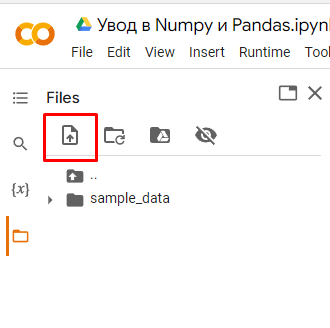

In [21]:
# df2 = pd.read_json('sample_data/anscombe.json')
# df=pd.read_csv('my_csv_file.csv')

Последно, рамка данни може да бъде внесена и от библиотека или ППИ:

In [22]:
import seaborn as sns
df3 = sns.load_dataset('iris')
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Задача

 - заредете набора данни ирис;
 - намерете средната дължина на близалцата (sepal_length);
 - намерете колко вида цветя има в набора;
 - намерете средната ширина на листата на подвида setosa.